In [10]:
import numpy as np
import scipy.interpolate as interpolate
from astropy.modeling.models import Sersic1D, Sersic2D
from astropy.modeling.core import Fittable1DModel, Parameter
import matplotlib.pyplot as plt
from astropy.visualization import hist
import timeit

In [2]:
def metropolis_hastings(target_density, size=500000):
    burnin_size = 10000
    size += burnin_size
    x0 = np.array([[0, 0]])
    xt = x0
    samples = []
    for i in range(size):
        xt_candidate = np.array([np.random.multivariate_normal(xt[0], np.eye(2))])
        accept_prob = (target_density(xt_candidate))/(target_density(xt))
        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate
        samples.append(xt)
    samples = np.array(samples[burnin_size:])
    samples = np.reshape(samples, [samples.shape[0], 2])
    return samples

In [3]:
def metropolis_hastings2D(target_density, size=500000):
    burnin_size = 10000
    size += burnin_size
    x0 = np.array([[0, 0]])
    xt = x0
    samples = []
    for i in range(size):
        xt_candidate = np.array([np.random.multivariate_normal(xt[0], np.eye(2))])
        accept_prob = (target_density(xt_candidate))/(target_density(xt))
        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate
        samples.append(xt)
    samples = np.array(samples[burnin_size:])
    samples = np.reshape(samples, [samples.shape[0], 2])
    return samples

In [4]:
def metropolis_hastings2D(target_density, size=500000):
    burnin_size = 10000
    size += burnin_size
    x0 = np.array([0, 0])
    xt = x0
    samples = []
    print(xt)
    for i in range(size):
        xt_candidate = np.random.multivariate_normal(xt, np.eye(2))
        accept_prob = (target_density(xt_candidate[0], xt_candidate[1]))/(target_density(xt[0], xt[1]))
        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate
        samples.append(xt)
    samples = np.array(samples[burnin_size:])
    samples = np.reshape(samples, [samples.shape[0], 2])
    return samples

In [5]:
x0 = np.array([[0, 0]])
xt = x0
xt_candidate = np.array([np.random.multivariate_normal(xt[0], np.eye(2))])
print(x0, xt, xt_candidate)

[[0 0]] [[0 0]] [[1.35093481 1.91841144]]


In [6]:
def gauss(z):
    z = np.reshape(z, [z.shape[0], 2])
    z1, z2 = z[:, 0], z[:, 1]
    exp1 = np.exp(-z1**2 / 2.) / np.sqrt(2.0 * np.pi)
    exp2 = np.exp(-z2**2 / 2.) / np.sqrt(2.0 * np.pi)
    return exp1*exp2
    #return np.exp(-x**2 / 2.) / np.sqrt(2.0 * np.pi)

def density1(z):
    z = np.reshape(z, [z.shape[0], 2])
    z1, z2 = z[:, 0], z[:, 1]
    norm = np.sqrt(z1 ** 2 + z2 ** 2)
    exp1 = np.exp(-0.5 * ((z1 - 2) / 0.8) ** 2)
    exp2 = np.exp(-0.5 * ((z2 + 2) / 0.8) ** 2)
    u = 0.5 * ((norm - 4) / 0.4) ** 2 - np.log(exp1 + exp2)
    return np.exp(-u)

In [8]:
mod = Sersic2D(amplitude = 1, r_eff = 25, n=4, x_0=50, y_0=50,
               ellip=.5, theta=-1)



In [12]:
start_time = timeit.default_timer()
samples = metropolis_hastings2D(mod, size=100000)
print("TIME with metropolis: ", timeit.default_timer() - start_time)

[0 0]
TIME with metropolis:  34.570054026989965


-39.12057467917739 263.53054468295255


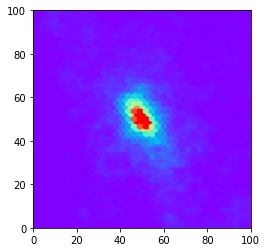

array([[55.9878826 , 65.38623151],
       [55.81752728, 66.02796076],
       [55.31905484, 66.39936301],
       ...,
       [49.69085073, 60.19027654],
       [47.90429195, 59.67882208],
       [48.46917857, 57.88050372]])

In [15]:
print(np.min(samples), np.max(samples))
plt.hexbin(samples[:,0], samples[:,1], cmap='rainbow', vmax=1000)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()


-3.996141825022952 3.8360921499806633


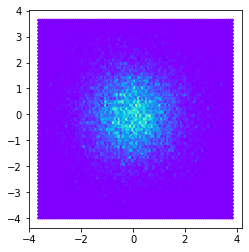

In [110]:
print(np.min(samples), np.max(samples))
plt.hexbin(samples[:,0], samples[:,1], cmap='rainbow', vmax=100)
plt.gca().set_aspect('equal', adjustable='box')
#plt.xlim([-3, 3])
#plt.ylim([-3, 3])
plt.show()